In [3]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="new_feature_1214.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [4]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["FF"])
resource_origin_data_lut=resource_origin_data_lut.drop("LUT",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)

In [5]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 229
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ARITLSHIFT                 212 non-null    int64  
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64  
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64  
 3   ARITLSHIFT_VALUE           212 non-null    int64  
 4   ARITRSHIFT                 212 non-null    int64  
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64  
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64  
 7   ARITRSHIFT_VALUE           212 non-null    int64  
 8   AlwaysConstructs           212 non-null    int64  
 9   AssignLHSPortNum           212 non-null    int64  
 10  AssignLHSWidth             212 non-null    int64  
 11  AssignRHSPortNum           212 non-null    int64  
 12  AssignRHSWidth             212 non-null    int64  
 13  AssignStmts                212 non-null    int64  

In [6]:
resource_origin_data_lut.describe()

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH,FF
count,212.0,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.0,0.0,0.113208,0.070755,0.674528,0.386792,2.287736,2.924528,...,0.523585,3.886792,0.495283,0.561321,3.783019,124.339623,0.250000,2.844340,13.976415,22.627358
std,0.0,0.0,0.0,0.0,0.758156,0.524014,4.576129,2.801728,3.237406,10.205192,...,2.526525,8.233927,4.434353,4.076405,5.397041,705.919378,2.236863,8.446055,52.403144,59.159899
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,4.500000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,4.000000,0.000000,0.000000,4.000000,31.000000,0.000000,1.250000,2.000000,26.000000
max,0.0,0.0,0.0,0.0,8.000000,7.000000,56.000000,28.000000,24.000000,127.000000,...,31.000000,55.000000,62.000000,56.000000,32.000000,8202.000000,32.000000,65.000000,575.000000,768.000000


In [139]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["FF"].sort_values(ascending=False)

FF                           1.000000
FORTIMES                     0.318122
REG                          0.267595
PLUS                         0.263268
NonBlockLeftWidth            0.251252
CONDITIONALTHEN              0.250369
CONDITIONALIF                0.250369
CONDITIONALELSE              0.248461
NonBlockingLeftPortNum       0.246407
NonBlockingAssign            0.246407
NonBlockRightWidth           0.227492
REDAND                       0.198197
AlwaysConstructs             0.197609
CONDITIONALIFWIDTH           0.194888
OUTPUTWIDTH                  0.187606
INPUTWIDTH                   0.177238
AssignRHSWidth               0.143146
CASECONDITIONNUM             0.136131
CASECONDITIONWIDTH           0.132652
ARITRSHIFT                   0.126581
MIN                          0.119910
CASEITEMNUM                  0.113249
ARITRSHIFT_PORT_NUM          0.112609
FORBLOCK                     0.106055
ARITRSHIFT_VALUE             0.101036
NonBlockingRightPortNum      0.099386
AssignLHSWid

In [140]:
#特征优化
resource_lut = resource_origin_data_lut["FF"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("FF",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [141]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [142]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [143]:
#深度学习

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [144]:
X_train.shape

(126, 59)

In [145]:
keras.backend.clear_session()
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(59, activation="relu")(input_)
#hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden1])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

In [185]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(27, activation="relu"),
    keras.layers.Dense(162, activation="relu"),
    keras.layers.Dense(53, activation="relu"),
    keras.layers.Dense(1)
])

In [230]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(1)
])

In [231]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.0001343909963682435))
history = model.fit(X_train_full, y_train_full, epochs=235, validation_data=(X_valid, y_valid))
# 绘制训练 & 验证的损失值

Epoch 1/235
6/6 [==============================] - 0s 19ms/step - loss: 1278.2708 - val_loss: 1615.6414
Epoch 2/235
6/6 [==============================] - 0s 8ms/step - loss: 1188.2742 - val_loss: 1484.4441
Epoch 3/235
6/6 [==============================] - 0s 8ms/step - loss: 1130.9529 - val_loss: 1380.9779
Epoch 4/235
6/6 [==============================] - 0s 8ms/step - loss: 1080.3850 - val_loss: 1284.5316
Epoch 5/235
6/6 [==============================] - 0s 8ms/step - loss: 1020.8812 - val_loss: 1202.9177
Epoch 6/235
6/6 [==============================] - 0s 8ms/step - loss: 968.2764 - val_loss: 1134.3162
Epoch 7/235
6/6 [==============================] - 0s 7ms/step - loss: 918.2999 - val_loss: 1073.7704
Epoch 8/235
6/6 [==============================] - 0s 6ms/step - loss: 872.7980 - val_loss: 1017.3882
Epoch 9/235
6/6 [==============================] - 0s 8ms/step - loss: 822.9366 - val_loss: 948.4166
Epoch 10/235
6/6 [==============================] - 0s 9ms/step - loss: 764.6

6/6 [==============================] - 0s 5ms/step - loss: 222.0339 - val_loss: 328.8887
Epoch 82/235
6/6 [==============================] - 0s 5ms/step - loss: 220.2129 - val_loss: 328.3008
Epoch 83/235
6/6 [==============================] - 0s 5ms/step - loss: 218.7426 - val_loss: 326.2459
Epoch 84/235
6/6 [==============================] - 0s 6ms/step - loss: 217.3180 - val_loss: 317.1800
Epoch 85/235
6/6 [==============================] - 0s 5ms/step - loss: 215.0140 - val_loss: 312.6311
Epoch 86/235
6/6 [==============================] - 0s 5ms/step - loss: 213.4566 - val_loss: 311.9493
Epoch 87/235
6/6 [==============================] - 0s 5ms/step - loss: 212.3834 - val_loss: 307.1684
Epoch 88/235
6/6 [==============================] - 0s 5ms/step - loss: 209.5891 - val_loss: 313.1704
Epoch 89/235
6/6 [==============================] - 0s 5ms/step - loss: 207.7968 - val_loss: 307.3568
Epoch 90/235
6/6 [==============================] - 0s 6ms/step - loss: 206.7237 - val_loss: 30

Epoch 161/235
6/6 [==============================] - 0s 5ms/step - loss: 160.4051 - val_loss: 213.9681
Epoch 162/235
6/6 [==============================] - 0s 6ms/step - loss: 160.2573 - val_loss: 215.6641
Epoch 163/235
6/6 [==============================] - 0s 6ms/step - loss: 158.8291 - val_loss: 216.7173
Epoch 164/235
6/6 [==============================] - 0s 6ms/step - loss: 158.1016 - val_loss: 217.3815
Epoch 165/235
6/6 [==============================] - 0s 6ms/step - loss: 157.0271 - val_loss: 218.9687
Epoch 166/235
6/6 [==============================] - 0s 6ms/step - loss: 156.8954 - val_loss: 221.4017
Epoch 167/235
6/6 [==============================] - 0s 6ms/step - loss: 156.7295 - val_loss: 224.0312
Epoch 168/235
6/6 [==============================] - 0s 6ms/step - loss: 156.7878 - val_loss: 226.3125
Epoch 169/235
6/6 [==============================] - 0s 8ms/step - loss: 156.0405 - val_loss: 216.6859
Epoch 170/235
6/6 [==============================] - 0s 6ms/step - loss: 

In [177]:

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [187]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 59)                3540      
                                                                 
 dense_1 (Dense)             (None, 27)                1620      
                                                                 
 dense_2 (Dense)             (None, 162)               4536      
                                                                 
 dense_3 (Dense)             (None, 53)                8639      
                                                                 
 dense_4 (Dense)             (None, 1)                 54        
                                                                 
Total params: 18,389
Trainable params: 18,389
Non-trainable params: 0
_________________________________________________________________


11.588582411562266
13.20758349740104
(array([], dtype=int64),)


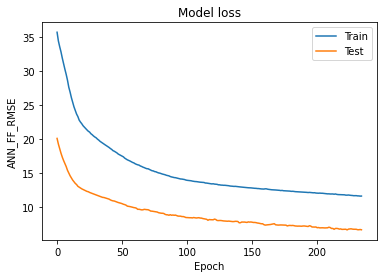

In [232]:
print(np.min(np.sqrt(history.history['loss'])))
print(np.min(np.sqrt(history.history['val_loss'])))
test = np.sqrt(history.history['val_loss'])
print(np.where(test==67.94991836823647))
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss'])/2)
plt.title('Model loss')
plt.ylabel('ANN_FF_RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [153]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3, input_shape=[59]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [154]:
def build_model_3(n_neurons=30, learning_rate=1e-3, input_shape=[59],unit1=1,unit2=2,unit3=3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(unit1, activation="relu"))
    model.add(keras.layers.Dense(unit2, activation="relu"))
    model.add(keras.layers.Dense(unit3, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [155]:
keras.backend.clear_session()
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_3)

<ipython-input-155-0c5b676cc640>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_3)


In [156]:
keras_reg

In [159]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_distribs = {
    "unit1": np.arange(1,100) .tolist(),
    "unit2": np.arange(1,200) .tolist(),
    "unit3": np.arange(1,100) .tolist(),
    "learning_rate": reciprocal(1e-4, 1e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=1000,
                  validation_data=(X_train_full, y_train_full),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/1000
3/3 [==============================] - 0s 39ms/step - loss: 866.9620 - val_loss: 8764.0684
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 229232816412879224832.0000 - val_loss: inf
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: nan - val_loss: nan
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: nan - val_loss: nan
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: nan - val_loss: nan
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: nan - val_loss: nan
Epoch 8/1000
3/3 [==============================] - 0s 21ms/step - loss: nan - val_loss: nan
Epoch 9/1000
3/3 [==============================] - 0s 18ms/step - loss: nan - val_loss: nan
Epoch 10/1000
3/3 [==============================] - 0s 20ms/step - 

3/3 [==============================] - 0s 13ms/step - loss: 268.8735 - val_loss: 456.5705
Epoch 45/1000
3/3 [==============================] - 0s 13ms/step - loss: 260.7849 - val_loss: 448.2722
Epoch 46/1000
3/3 [==============================] - 0s 14ms/step - loss: 248.1683 - val_loss: 441.5628
Epoch 47/1000
3/3 [==============================] - 0s 12ms/step - loss: 238.3057 - val_loss: 434.7107
Epoch 48/1000
3/3 [==============================] - 0s 13ms/step - loss: 230.7828 - val_loss: 428.9184
Epoch 49/1000
3/3 [==============================] - 0s 13ms/step - loss: 227.0184 - val_loss: 426.7997
Epoch 50/1000
3/3 [==============================] - 0s 12ms/step - loss: 217.0105 - val_loss: 421.3552
Epoch 51/1000
3/3 [==============================] - 0s 13ms/step - loss: 211.3706 - val_loss: 416.3040
Epoch 52/1000
3/3 [==============================] - 0s 13ms/step - loss: 203.9442 - val_loss: 405.7093
Epoch 53/1000
3/3 [==============================] - 0s 13ms/step - loss: 196.

3/3 [==============================] - 0s 16ms/step - loss: 339.1441 - val_loss: 532.2388
Epoch 16/1000
3/3 [==============================] - 0s 17ms/step - loss: 320.4700 - val_loss: 523.1582
Epoch 17/1000
3/3 [==============================] - 0s 16ms/step - loss: 310.3034 - val_loss: 517.1072
Epoch 18/1000
3/3 [==============================] - 0s 18ms/step - loss: 304.2491 - val_loss: 513.8568
Epoch 19/1000
3/3 [==============================] - 0s 14ms/step - loss: 297.0456 - val_loss: 500.5042
Epoch 20/1000
3/3 [==============================] - 0s 14ms/step - loss: 284.7630 - val_loss: 496.6009
Epoch 21/1000
3/3 [==============================] - 0s 14ms/step - loss: 275.4106 - val_loss: 483.0760
Epoch 22/1000
3/3 [==============================] - 0s 13ms/step - loss: 264.9175 - val_loss: 476.1674
Epoch 23/1000
3/3 [==============================] - 0s 12ms/step - loss: 259.8665 - val_loss: 470.7567
Epoch 24/1000
3/3 [==============================] - 0s 13ms/step - loss: 251.

3/3 [==============================] - 0s 12ms/step - loss: 407.7916 - val_loss: 472.2810
Epoch 21/1000
3/3 [==============================] - 0s 13ms/step - loss: 385.5868 - val_loss: 466.5201
Epoch 22/1000
3/3 [==============================] - 0s 12ms/step - loss: 366.9352 - val_loss: 465.3280
Epoch 23/1000
3/3 [==============================] - 0s 13ms/step - loss: 348.1723 - val_loss: 458.2262
Epoch 24/1000
3/3 [==============================] - 0s 13ms/step - loss: 334.6813 - val_loss: 460.0474
Epoch 25/1000
3/3 [==============================] - 0s 13ms/step - loss: 318.9986 - val_loss: 455.4041
Epoch 26/1000
3/3 [==============================] - 0s 15ms/step - loss: 305.0497 - val_loss: 456.0833
Epoch 27/1000
3/3 [==============================] - 0s 14ms/step - loss: 293.5645 - val_loss: 460.2044
Epoch 28/1000
3/3 [==============================] - 0s 12ms/step - loss: 282.5469 - val_loss: 463.0121
Epoch 29/1000
3/3 [==============================] - 0s 12ms/step - loss: 271.

3/3 [==============================] - 0s 14ms/step - loss: 832.0624 - val_loss: 827.1870
Epoch 10/1000
3/3 [==============================] - 0s 13ms/step - loss: 398.7788 - val_loss: 428.1668
Epoch 11/1000
3/3 [==============================] - 0s 18ms/step - loss: 184.2594 - val_loss: 366.3836
Epoch 12/1000
3/3 [==============================] - 0s 14ms/step - loss: 244.3325 - val_loss: 1173.7521
Epoch 13/1000
3/3 [==============================] - 0s 18ms/step - loss: 824.2765 - val_loss: 945.5073
Epoch 14/1000
3/3 [==============================] - 0s 17ms/step - loss: 515.2830 - val_loss: 681.5081
Epoch 15/1000
3/3 [==============================] - 0s 12ms/step - loss: 256.3962 - val_loss: 1080.2646
Epoch 16/1000
3/3 [==============================] - 0s 17ms/step - loss: 716.6954 - val_loss: 850.6245
Epoch 17/1000
3/3 [==============================] - 0s 13ms/step - loss: 501.4113 - val_loss: 1306.6614
Epoch 18/1000
3/3 [==============================] - 0s 17ms/step - loss: 9

Epoch 27/1000
3/3 [==============================] - 0s 16ms/step - loss: 216.6404 - val_loss: 392.0032
Epoch 28/1000
3/3 [==============================] - 0s 16ms/step - loss: 212.2114 - val_loss: 385.5506
Epoch 29/1000
3/3 [==============================] - 0s 12ms/step - loss: 204.6171 - val_loss: 380.3369
Epoch 30/1000
3/3 [==============================] - 0s 12ms/step - loss: 195.2156 - val_loss: 375.5313
Epoch 31/1000
3/3 [==============================] - 0s 17ms/step - loss: 190.2770 - val_loss: 368.9796
Epoch 32/1000
3/3 [==============================] - 0s 13ms/step - loss: 184.1757 - val_loss: 364.9610
Epoch 33/1000
3/3 [==============================] - 0s 17ms/step - loss: 179.6166 - val_loss: 359.3057
Epoch 34/1000
3/3 [==============================] - 0s 17ms/step - loss: 177.0064 - val_loss: 354.9570
Epoch 35/1000
3/3 [==============================] - 0s 12ms/step - loss: 169.8313 - val_loss: 352.2191
Epoch 36/1000
3/3 [==============================] - 0s 13ms/ste

3/3 [==============================] - 0s 14ms/step - loss: 1074.7791 - val_loss: 1188.7848
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 1052.4768 - val_loss: 1158.2959
Epoch 8/1000
3/3 [==============================] - 0s 13ms/step - loss: 1024.7888 - val_loss: 1119.7655
Epoch 9/1000
3/3 [==============================] - 0s 18ms/step - loss: 989.6466 - val_loss: 1071.1365
Epoch 10/1000
3/3 [==============================] - 0s 15ms/step - loss: 943.2113 - val_loss: 1008.5216
Epoch 11/1000
3/3 [==============================] - 0s 17ms/step - loss: 878.1147 - val_loss: 924.4029
Epoch 12/1000
3/3 [==============================] - 0s 18ms/step - loss: 791.2987 - val_loss: 829.1886
Epoch 13/1000
3/3 [==============================] - 0s 18ms/step - loss: 693.2860 - val_loss: 726.9880
Epoch 14/1000
3/3 [==============================] - 0s 16ms/step - loss: 582.4195 - val_loss: 642.8820
Epoch 15/1000
3/3 [==============================] - 0s 14ms/step - loss:

3/3 [==============================] - 0s 14ms/step - loss: 535.9048 - val_loss: 587.0679
Epoch 20/1000
3/3 [==============================] - 0s 14ms/step - loss: 508.8287 - val_loss: 567.1583
Epoch 21/1000
3/3 [==============================] - 0s 13ms/step - loss: 491.9495 - val_loss: 551.4498
Epoch 22/1000
3/3 [==============================] - 0s 12ms/step - loss: 456.1538 - val_loss: 537.2073
Epoch 23/1000
3/3 [==============================] - 0s 15ms/step - loss: 440.2617 - val_loss: 524.2262
Epoch 24/1000
3/3 [==============================] - 0s 13ms/step - loss: 416.3533 - val_loss: 505.7925
Epoch 25/1000
3/3 [==============================] - 0s 14ms/step - loss: 392.6152 - val_loss: 498.6674
Epoch 26/1000
3/3 [==============================] - 0s 13ms/step - loss: 373.4891 - val_loss: 494.0645
Epoch 27/1000
3/3 [==============================] - 0s 14ms/step - loss: 359.3380 - val_loss: 490.7957
Epoch 28/1000
3/3 [==============================] - 0s 13ms/step - loss: 340.

Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: nan - val_loss: nan
Epoch 8/1000
3/3 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 9/1000
3/3 [==============================] - 0s 17ms/step - loss: nan - val_loss: nan
Epoch 10/1000
3/3 [==============================] - 0s 14ms/step - loss: nan - val_loss: nan
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: nan
[CV] END learning_rate=0.004605652410721728, unit1=63, unit2=195, unit3=89; total time=   0.6s
Epoch 1/1000
3/3 [==============================] - 0s 40ms/step - loss: 763.6678 - val_loss: 1302.6384
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 1122.3596 - val_loss: 1089.9724
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 1213.7970 - val_loss: 1258.7943
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 1071.1980 - val_loss: 826.8456
Epoch 5/1000
3/3 [===================

3/3 [==============================] - 0s 16ms/step - loss: 857.1570 - val_loss: 1031.2457
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 769.8834 - val_loss: 857.7056
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 625.4624 - val_loss: 669.1790
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 464.7699 - val_loss: 519.3463
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 342.3276 - val_loss: 469.8207
Epoch 8/1000
3/3 [==============================] - 0s 19ms/step - loss: 287.0954 - val_loss: 461.2842
Epoch 9/1000
3/3 [==============================] - 0s 18ms/step - loss: 267.8290 - val_loss: 432.3808
Epoch 10/1000
3/3 [==============================] - 0s 17ms/step - loss: 224.3054 - val_loss: 403.4588
Epoch 11/1000
3/3 [==============================] - 0s 15ms/step - loss: 203.0193 - val_loss: 400.7192
Epoch 12/1000
3/3 [==============================] - 0s 13ms/step - loss: 190.5960 

3/3 [==============================] - 0s 15ms/step - loss: 90.0809 - val_loss: 459.2046
Epoch 30/1000
3/3 [==============================] - 0s 15ms/step - loss: 89.5607 - val_loss: 499.7950
Epoch 31/1000
3/3 [==============================] - 0s 14ms/step - loss: 96.1513 - val_loss: 499.6559
Epoch 32/1000
3/3 [==============================] - 0s 18ms/step - loss: 82.8085 - val_loss: 470.5212
Epoch 33/1000
2/2 [==============================] - 0s 3ms/step - loss: 275.5636
[CV] END learning_rate=0.00041271597950230996, unit1=57, unit2=172, unit3=48; total time=   1.4s
Epoch 1/1000
3/3 [==============================] - 0s 46ms/step - loss: 1159.8516 - val_loss: 1243.2292
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 1130.6664 - val_loss: 1195.1368
Epoch 3/1000
3/3 [==============================] - 0s 18ms/step - loss: 1091.7031 - val_loss: 1119.4546
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 1024.9456 - val_loss: 991.4037
Epoc

H:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [          nan -292.8899231            nan -812.90844727 -279.67202759
           nan           nan -966.324646   -366.39852905           nan]
  warnings.warn(


4/4 [==============================] - 0s 27ms/step - loss: 1091.6252 - val_loss: 1268.2126
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 1078.0178 - val_loss: 1247.1367
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 1064.6073 - val_loss: 1225.3020
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 1048.5090 - val_loss: 1198.9891
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 1029.0660 - val_loss: 1167.2762
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 1005.8030 - val_loss: 1128.5165
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 974.9099 - val_loss: 1079.5249
Epoch 8/1000
4/4 [==============================] - 0s 13ms/step - loss: 934.2357 - val_loss: 1018.6609
Epoch 9/1000
4/4 [==============================] - 0s 12ms/step - loss: 879.7979 - val_loss: 942.3195
Epoch 10/1000
4/4 [==============================] - 0s 12ms/step - loss

4/4 [==============================] - 0s 9ms/step - loss: 99.0090 - val_loss: 329.0634
Epoch 80/1000
4/4 [==============================] - 0s 13ms/step - loss: 98.0810 - val_loss: 328.9858
Epoch 81/1000
4/4 [==============================] - 0s 13ms/step - loss: 96.3780 - val_loss: 328.1242
Epoch 82/1000
4/4 [==============================] - 0s 12ms/step - loss: 97.1116 - val_loss: 331.4134
Epoch 83/1000
4/4 [==============================] - 0s 11ms/step - loss: 94.2417 - val_loss: 331.3982
Epoch 84/1000
4/4 [==============================] - 0s 12ms/step - loss: 94.9246 - val_loss: 331.0997
Epoch 85/1000
4/4 [==============================] - 0s 12ms/step - loss: 94.7790 - val_loss: 326.2401
Epoch 86/1000
4/4 [==============================] - 0s 8ms/step - loss: 91.4884 - val_loss: 329.1815
Epoch 87/1000
4/4 [==============================] - 0s 9ms/step - loss: 90.6018 - val_loss: 330.7342
Epoch 88/1000
4/4 [==============================] - 0s 11ms/step - loss: 90.5831 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000018BE90AAE50>,
                   param_distributions={'learning_rate': [0.009471840989813468,
                                                          0.0017503230837679227,
                                                          0.00015928254033628522,
                                                          0.00015822421896988855,
                                                          0.003954497409596563,
                                                          0.000841881781433461,
                                                          0.00017948368318133974,
                                                          0.002624826778951884,
                                                          0.0013194392339356158,
                                                          0.00765168...
                                                          0.00180632710

In [207]:
rnd_search_cv.best_params_

{'unit3': 27,
 'unit2': 162,
 'unit1': 53,
 'learning_rate': 0.0001343909963682435}

In [161]:
rnd_search_cv.best_score_

-279.6720275878906

In [189]:
model = rnd_search_cv.best_estimator_.model

In [208]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 59)                3540      
                                                                 
 dense_1 (Dense)             (None, 1)                 60        
                                                                 
Total params: 3,600
Trainable params: 3,600
Non-trainable params: 0
_________________________________________________________________


In [163]:
rnd_search_cv.cv_results_

{'mean_fit_time': array([0.69871918, 2.59909495, 0.87065721, 0.93897208, 2.70470794,
        0.74808065, 0.76839336, 0.72326859, 1.69416658, 0.69851176]),
 'std_fit_time': array([0.05058733, 0.9752382 , 0.18831132, 0.055787  , 0.85454295,
        0.08513181, 0.06319922, 0.02660554, 0.34227011, 0.04236706]),
 'mean_score_time': array([0.03545086, 0.03558707, 0.035743  , 0.04027438, 0.04008993,
        0.04006259, 0.041116  , 0.03890316, 0.03908594, 0.03675469]),
 'std_score_time': array([0.00077811, 0.00084424, 0.00125875, 0.00415359, 0.00156481,
        0.00191007, 0.00134692, 0.00392411, 0.00362176, 0.00127689]),
 'param_unit3': masked_array(data=[56, 9, 28, 47, 27, 25, 89, 82, 48, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_unit2': masked_array(data=[196, 61, 166, 12, 162, 182, 195, 21, 172, 64],
              mask=[False, False, False, False, False, Fal

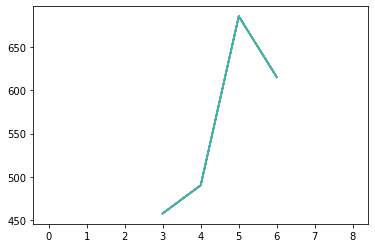

In [252]:
for i in rnd_search_cv.cv_results_["param_learning_rate"]:
    plt.plot(rnd_search_cv.cv_results_[""],rnd_search_cv.cv_results_["std_test_score"])


In [219]:
deep_predict = model.predict(X_valid)

In [220]:
from sklearn.metrics import r2_score
r2_score(y_valid,deep_predict)

0.8506712651764239

In [166]:
y_train_full

140      0.0
120     21.0
80      30.0
95       0.0
109     51.0
       ...  
118      8.0
17     104.0
104      0.0
195      0.0
114     30.0
Name: FF, Length: 169, dtype: float64

4/4 [==============================] - 0s 4ms/step - loss: 152.1620


5/5 [==============================] - 0s 4ms/step - loss: 134.4281


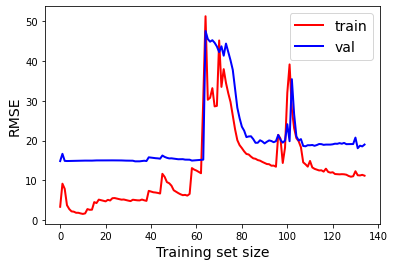

In [167]:
plot_learning_curves(model, X_train_full, y_train_full)
#plt.axis([0, 200, 0, 200])                         # not shown in the book
plt.show() 

In [221]:
predict = model.predict(X_valid)
predict

array([[7.2359591e+00],
       [1.3632851e+01],
       [4.8989056e+01],
       [2.1680448e+00],
       [1.1528804e+01],
       [1.1583439e+01],
       [1.3770494e+01],
       [4.2734283e+01],
       [8.9432365e+01],
       [1.5546970e+00],
       [2.9836563e+01],
       [2.5677956e+01],
       [3.1908007e+00],
       [3.1953632e+01],
       [3.8558395e+00],
       [1.4238472e+01],
       [1.8821957e+00],
       [1.2999111e+01],
       [3.4223132e+00],
       [5.9464679e+00],
       [3.3418465e+00],
       [3.2911293e+01],
       [2.1162806e+00],
       [2.7812593e+00],
       [1.5375492e+01],
       [4.1285038e+01],
       [1.3295522e+00],
       [3.8558395e+00],
       [8.1520967e+00],
       [7.1382355e+01],
       [4.2017961e+00],
       [6.4948334e+01],
       [1.7120163e+00],
       [2.1065126e+01],
       [3.4329822e+00],
       [3.7857018e+01],
       [5.3551140e+00],
       [1.4600938e+02],
       [7.7471939e+01],
       [3.5127754e+00],
       [5.6931796e+00],
       [2.430990

In [222]:
y_valid

48       4.0
164     16.0
213     27.0
88       2.0
67      24.0
81      16.0
44      16.0
71      64.0
156    117.0
142      0.0
168     16.0
224     20.0
14       0.0
11      45.0
136      0.0
218     17.0
140      0.0
157     24.0
29       4.0
118      8.0
186      2.0
101     33.0
92       0.0
201      1.0
159     15.0
214     37.0
103      0.0
137      0.0
198      2.0
107     72.0
61       0.0
8       64.0
208      0.0
76       0.0
117      0.0
1       56.0
87       2.0
85     145.0
56     147.0
151      1.0
52       8.0
220      4.0
191      0.0
Name: FF, dtype: float64

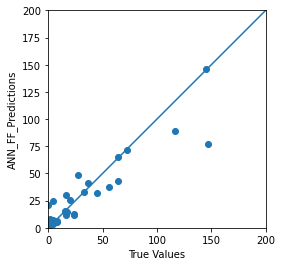

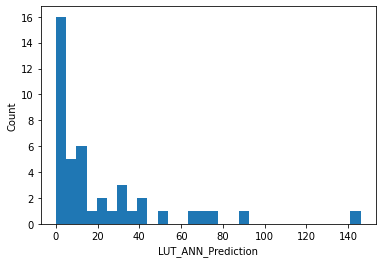

In [223]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_valid,predict)
plt.xlabel('True Values')
plt.ylabel('ANN_FF_Predictions')
Lims=[0,200]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(predict,bins=30)
plt.xlabel('LUT_ANN_Prediction')
plt.ylabel('Count')
plt.grid(False)
